Import the necessary libraries.

In [ ]:
import random
from datetime import datetime
from dataclasses import dataclass, field
import numpy as np



---
# Experiments


The following is an example of how distances are computed.

In [ ]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
import time


def generate_sha256_hash(data):
    digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
    digest.update(data)
    return digest.finalize()

def bytes_to_integer(data):
    integer_representation = int.from_bytes(data, byteorder='big')
    return integer_representation


if __name__ == "__main__":
        data = b"123415"
        hash_value = generate_sha256_hash(data)
        hash1 = bytes_to_integer(hash_value)
        # print(hex(hash1))
        print(hash_value.hex())

        data = b"12341"
        hash_value = generate_sha256_hash(data)
        hash2 = bytes_to_integer(hash_value)
        # print(hex(hash2))
        print(hash_value.hex())

        diff = hash1 ^ hash2
        print("Difference:")
        print(diff)

624434d720984b65842eb9e98ee47abdf248a7b0f1e9b9274d60224fdf7c26a9
f6ff5adab5180a3d10ffb611f2caddd0a2b0922bde398ad186e946480bec3943
Difference:
67273461549758729595315090093437865851328064211884797168643376310320695877610


The following code measures the time taken to perform distance comparisons.

In [ ]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
import time


# num_nodes = 10
time_array = [0]*9 #Store values from 10 to 10,000,000

if __name__ == "__main__":
    count = 0
    for num_nodes in (10**i for i in range(1, 10)):
      start_time = time.time()

      for i in range (num_nodes):
        hash1 = 0xf6ff5adab5180a3d10ffb611f2caddd0a2b0922bde398ad186e946480bec3943
        hash2 = 0x624434d720984b65842eb9e98ee47abdf248a7b0f1e9b9274d60224fdf7c26a9

        diff = hash1 ^ hash2
      end_time = time.time()

      # Calculate the elapsed time in seconds
      elapsed_time = end_time - start_time

      # Print the elapsed time
      print(f"For {num_nodes} nodes, the elapsed time: {elapsed_time} seconds")
      time_array[count] = elapsed_time
      count = count+1
    print(time_array)

For 10 nodes, the elapsed time: 4.291534423828125e-06 seconds
For 100 nodes, the elapsed time: 2.6226043701171875e-05 seconds
For 1000 nodes, the elapsed time: 0.00020265579223632812 seconds
For 10000 nodes, the elapsed time: 0.0016226768493652344 seconds
For 100000 nodes, the elapsed time: 0.021474599838256836 seconds
For 1000000 nodes, the elapsed time: 0.16056323051452637 seconds
For 10000000 nodes, the elapsed time: 1.6812143325805664 seconds
For 100000000 nodes, the elapsed time: 19.06484293937683 seconds
For 1000000000 nodes, the elapsed time: 183.2874493598938 seconds
[4.291534423828125e-06, 2.6226043701171875e-05, 0.00020265579223632812, 0.0016226768493652344, 0.021474599838256836, 0.16056323051452637, 1.6812143325805664, 19.06484293937683, 183.2874493598938]


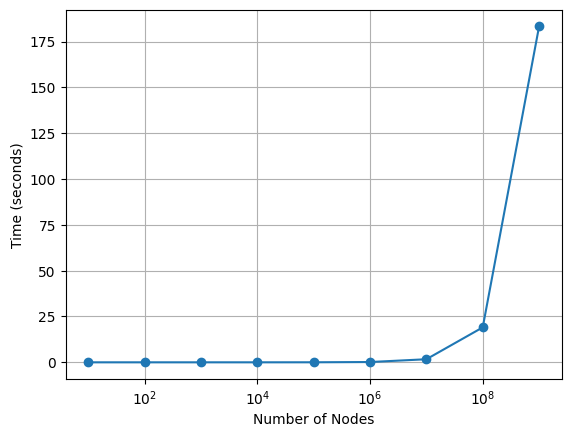

In [ ]:
import matplotlib.pyplot as plt

# Given arrays
time_array = [4.291534423828125e-06, 2.6226043701171875e-05, 0.00020265579223632812, 0.0016226768493652344, 0.021474599838256836, 0.16056323051452637, 1.6812143325805664, 19.06484293937683, 183.2874493598938]
value = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

# Plotting the line graph
plt.plot(value, time_array, marker='o')

# Setting the labels for x and y axes
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')


# Display the plot
plt.grid(True)
plt.xscale('log')  # Log scale for better visualization of the large range in values
plt.show()


Reading and importing datasheet in Excel format

In [ ]:
import pandas as pd

def read_excel_sheet(file_path, sheet_name):
    # Read the Excel file
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def extract_data(df):
    extracted_data = df[['Customer', 'date', 'Ratio']]
    return extracted_data

# Example usage
if __name__ == "__main__":
    file_path = 'dataset_100_ratio.xlsx'
    sheet_name = 'Sheet1'

    df = read_excel_sheet(file_path, sheet_name)
    print("DataFrame:")
    print(df)

    extracted_data = extract_data(df)
    print("\nExtracted Data:")
    print(extracted_data)

DataFrame:
       Customer       date     Ratio
0             1 2012-07-01  0.382786
1             2 2012-07-01  0.147095
2             3 2012-07-01  0.122727
3             4 2012-07-01  0.127445
4             5 2012-07-01  0.128176
...         ...        ...       ...
30293        96 2013-06-30  0.238890
30294        97 2013-06-30  0.000000
30295        98 2013-06-30  0.055201
30296        99 2013-06-30  0.107767
30297       100 2013-06-30  1.272486

[30298 rows x 3 columns]

Extracted Data:
       Customer       date     Ratio
0             1 2012-07-01  0.382786
1             2 2012-07-01  0.147095
2             3 2012-07-01  0.122727
3             4 2012-07-01  0.127445
4             5 2012-07-01  0.128176
...         ...        ...       ...
30293        96 2013-06-30  0.238890
30294        97 2013-06-30  0.000000
30295        98 2013-06-30  0.055201
30296        99 2013-06-30  0.107767
30297       100 2013-06-30  1.272486

[30298 rows x 3 columns]


After running the code cell above, the data already extracted and can be used.

The following performs simulation on real data, limited to 100 nodes for 1 year.

In [ ]:
#Simulation with real data, 100 nodes, 1 year

import struct

# This is the ratio of contribution to generation to participate in the hashing process
# diff_ratio = difficulty ratio
diff_ratio = 0.1

def date_to_hash(i):
  date = pd.Timestamp(i)
  ts = date.timestamp()
  hash_value = generate_sha256_hash(struct.pack('d', ts))
  return bytes_to_integer(hash_value)

def ratio_to_hash(i):
  hash_value = generate_sha256_hash(struct.pack('d', i))
  return(bytes_to_integer(hash_value))

# The following is an array to store how many times each node is selected as a block leader
leader = [0] * 100

# The following are variables to store the smallest distance/nearest node for comparison
smallest_distance = 0
nearest_node = 0

# We go through each day in the dataset for each of the 100 nodes and try to find the nearest node
# The "target" is a hash obtained from the date (timestamp) information (this could be modified later)
count = 0 #row counter
i = df.iloc[count]['date'] #First timestamp
target_hash = date_to_hash(i) #Convert to hash
# print(hex(target_hash))

# We loop through all data points, each data point corresponds to the contribution/generation of a node in a particular day
# Some nodes have no data on specific days
while(count!=30298): #Number of data points
  if (df.iloc[count]['date'] == i): #If it's still the current date

    #Get customerID
    custID = df.iloc[count]['Customer']

    #Get customer ratio
    ratio = df.iloc[count]['Ratio']

    #Check if ratio exceeds diff_ratio%
    if (ratio >= diff_ratio):
      node_hash = ratio_to_hash(ratio)
      # print(hex(node_hash))
      #calculate distance to target hash
      cur_distance = node_hash ^ target_hash

      if (smallest_distance == 0):
        smallest_distance = cur_distance
        nearest_node = custID

      elif (cur_distance < smallest_distance):
        smallest_distance = cur_distance
        nearest_node = custID

    # else:
    #   print(ratio, "insufficient")

    count = count + 1

  else:
    # print("Closest node is", nearest_node, " on ", i)
    leader[nearest_node-1] = leader[nearest_node-1] + 1
    i = df.iloc[count]['date']
    # print("Moving on to", i)
    closest_node = 99999999
    smallest_distance = 0
    i = df.iloc[count]['date'] #new date
    target_hash = date_to_hash(i) #Convert to hash
    # print("New target:", hex(target_hash))

# Print the results after 1 year's worth of data
print(leader)

#Customer 2, 4, 6, 8 etc. all never get selected because they don't have ratios above 50%
#Customer 1 has very good generation ratios, some above 100%

[10, 10, 2, 6, 3, 5, 5, 4, 6, 3, 3, 1, 4, 3, 4, 3, 1, 5, 0, 1, 4, 1, 0, 1, 4, 3, 5, 4, 2, 5, 2, 2, 6, 7, 3, 5, 0, 2, 6, 1, 7, 9, 4, 4, 4, 1, 3, 2, 4, 2, 7, 4, 6, 2, 3, 0, 5, 5, 3, 3, 6, 0, 2, 7, 3, 1, 0, 10, 3, 7, 6, 4, 1, 3, 6, 2, 9, 1, 1, 3, 7, 2, 3, 5, 3, 3, 5, 2, 2, 2, 0, 2, 0, 6, 2, 4, 4, 4, 9, 4]


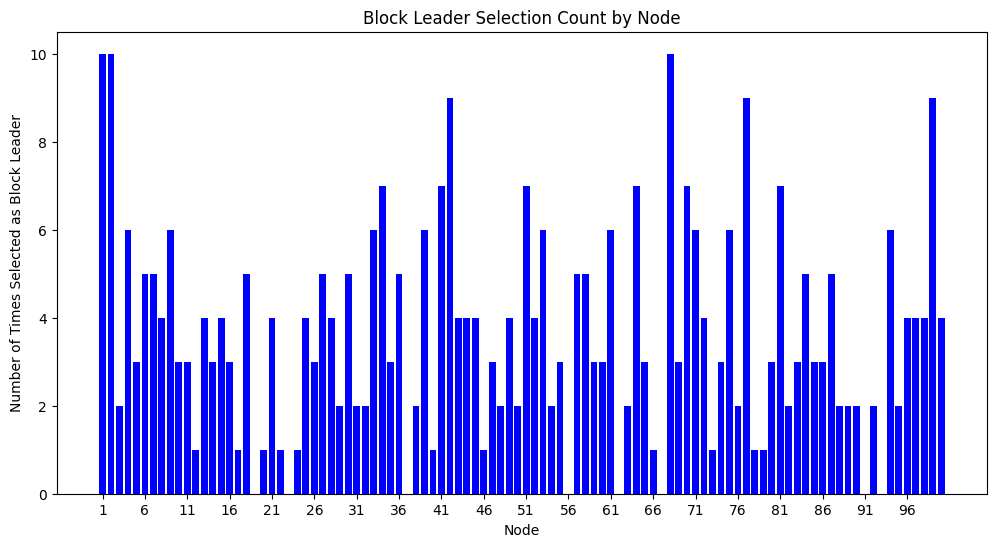

In [ ]:
import matplotlib.pyplot as plt

# Create a list of node indices (0 to 99)
nodes = list(range(1, 101))

plt.figure(figsize=(12, 6))
plt.bar(nodes, leader, color='blue')

# Add titles and labels
plt.title('Block Leader Selection Count by Node')
plt.xlabel('Node')
plt.ylabel('Number of Times Selected as Block Leader')
# Set x-axis tick marks every 2 nodes
plt.xticks(ticks=range(1, 101, 5))
# Display the chart
plt.show()

In [ ]:
#Simulation with all nodes contributing equally

import struct, random

def date_to_hash(i):
  date = pd.Timestamp(i)
  ts = date.timestamp()
  hash_value = generate_sha256_hash(struct.pack('d', ts))
  return bytes_to_integer(hash_value)

def ratio_to_hash(i):
  hash_value = generate_sha256_hash(struct.pack('d', i))
  return(bytes_to_integer(hash_value))

leader = [0] * 100

smallest_distance = 0
nearest_node = 0

#For each date, find nearest node
count = 0 #row counter
i = df.iloc[count]['date'] #First timestamp
target_hash = date_to_hash(i) #Convert to hash
# print(hex(target_hash))

while(count!=30298): #Number of data points
  if (df.iloc[count]['date'] == i): #If it's still the current date

    #Get customerID
    custID = df.iloc[count]['Customer']

    #Get customer ratio
    ratio = df.iloc[count]['Ratio']
    # print(ratio
    #Fixed ratio above 0.5
    ratio = 0.6

    #Check if ratio exceeds 50%
    if (ratio >= 0.5):
      node_hash = ratio_to_hash(ratio+random.random())
      # print(hex(node_hash))
      #calculate distance to target hash
      cur_distance = node_hash ^ target_hash

      if (smallest_distance == 0):
        smallest_distance = cur_distance
        nearest_node = custID

      elif (cur_distance < smallest_distance):
        smallest_distance = cur_distance
        nearest_node = custID

    # else:
    #   print(ratio, "insufficient")

    count = count + 1

  else:
    # print("Closest node is", nearest_node, " on ", i)
    leader[nearest_node-1] = leader[nearest_node-1] + 1
    i = df.iloc[count]['date']
    # print("Moving on to", i)
    closest_node = 99999999
    smallest_distance = 0
    i = df.iloc[count]['date'] #new date
    target_hash = date_to_hash(i) #Convert to hash
    # print("New target:", hex(target_hash))

print(leader)

  # for i in range(101): #Number of nodes
  #   custID = df.iloc[i]['Customer']
  #   if custID == i+1:
  #     print(i)
  #   else:
  #     i = i+1
  #     print(type(df.iloc[i]['Customer']))


In [ ]:
# Simplified simulation, 10000 days, 100 nodes, shows balanced distribution
# In this simplified simulation, the contributions of nodes are randomised
smallest_distance = 0
nearest_node = 0
leader = [0] * 100

duration = 10000

for days in range(duration):
  target_hash = ratio_to_hash(days+random.random())
  for nodes in range(0,100):
      node_hash = ratio_to_hash(random.random())
      #calculate distance to target hash
      cur_distance = node_hash ^ target_hash
      # print(hex(cur_distance),hex(node_hash))
      if (smallest_distance == 0):
        smallest_distance = cur_distance
        nearest_node = nodes
      elif (cur_distance < smallest_distance):
        smallest_distance = cur_distance
        nearest_node = nodes

  # print("Closest node is", nearest_node, " on ", days
  leader[nearest_node] = leader[nearest_node] + 1
  smallest_distance = 0

print(leader)


[105, 83, 89, 103, 92, 89, 101, 83, 103, 95, 108, 94, 105, 103, 111, 104, 90, 114, 90, 99, 114, 95, 94, 109, 108, 98, 94, 96, 99, 96, 92, 109, 103, 104, 99, 94, 104, 90, 100, 88, 97, 120, 85, 97, 93, 82, 95, 87, 104, 96, 97, 97, 78, 102, 106, 106, 101, 85, 120, 96, 93, 99, 90, 132, 88, 109, 103, 105, 112, 94, 91, 100, 110, 104, 82, 107, 119, 102, 95, 98, 88, 109, 116, 99, 112, 105, 110, 99, 88, 109, 106, 95, 110, 108, 99, 110, 105, 101, 112, 95]
